<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.976818,86.610330,0.000879,155.588028,155.586164,0.001864
1,0.0,1.0,98.733817,91.747861,-0.000851,200.480827,200.481151,-0.000325
2,0.0,2.0,85.931719,59.407702,-0.000329,155.339092,155.340169,-0.001077
3,0.0,3.0,71.806520,54.055011,-0.001436,135.860094,135.862278,-0.002184
4,0.0,4.0,63.832449,69.484090,-0.004206,143.312333,143.316433,-0.004100
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.324413,94.428306,0.000017,165.752737,165.752410,0.000327
19996,999.0,16.0,77.088013,58.141794,-0.002417,145.227391,145.230607,-0.003217
19997,999.0,17.0,25.398446,73.183314,0.001244,108.583004,108.582859,0.000145
19998,999.0,18.0,32.363120,95.696094,-0.002185,138.057030,138.059343,-0.002313


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.976818,86.610330,0.000879,155.588028,155.586164,0.001864
1,0.0,1.0,98.733817,91.747861,-0.000851,200.480827,200.481151,-0.000325
2,0.0,2.0,85.931719,59.407702,-0.000329,155.339092,155.340169,-0.001077
3,0.0,3.0,71.806520,54.055011,-0.001436,135.860094,135.862278,-0.002184
4,0.0,4.0,63.832449,69.484090,-0.004206,143.312333,143.316433,-0.004100
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.324413,94.428306,0.000017,165.752737,165.752410,0.000327
19996,999.0,16.0,77.088013,58.141794,-0.002417,145.227391,145.230607,-0.003217
19997,999.0,17.0,25.398446,73.183314,0.001244,108.583004,108.582859,0.000145
19998,999.0,18.0,32.363120,95.696094,-0.002185,138.057030,138.059343,-0.002313


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

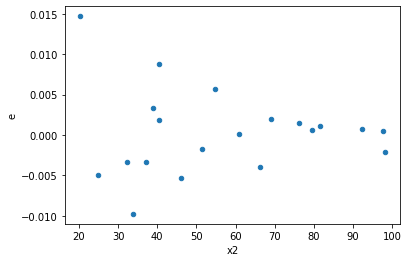

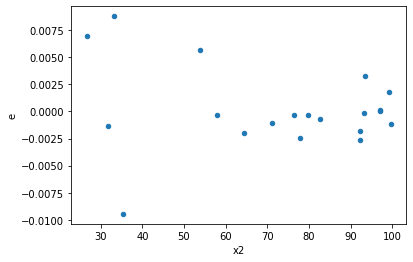

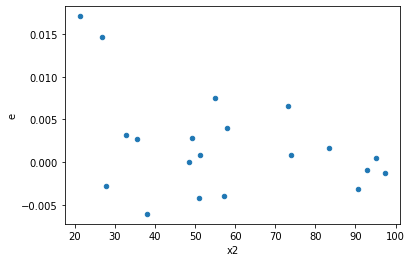

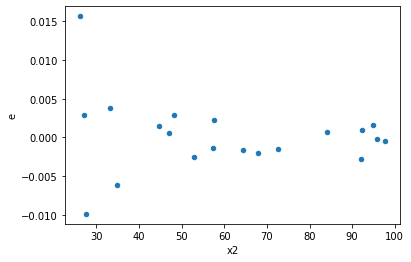

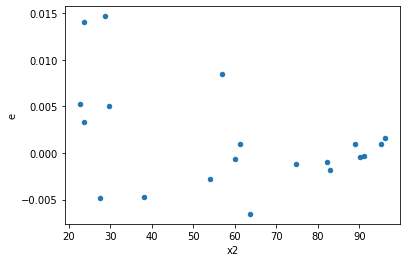

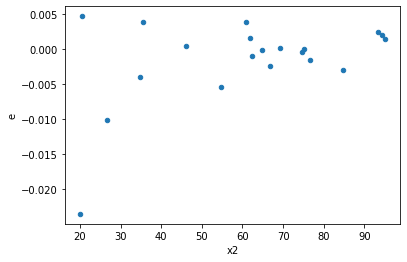

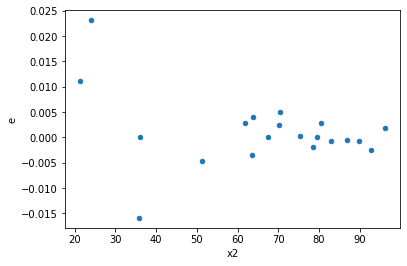

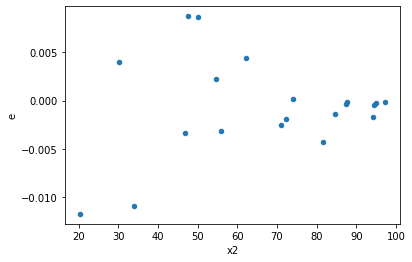

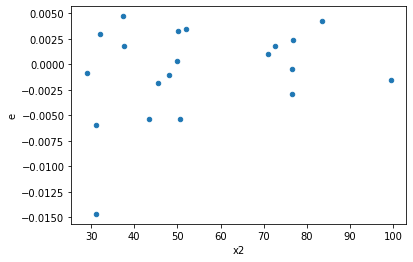

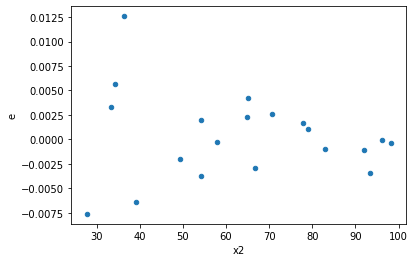

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,10.0,6.0,8.959455695914086e-05,6.322223356950381e-05,8.959455695914085e-06,1.0537038928250635e-05,1.1760802537430928,0.8793998350768613,0.5603000824615694,0.43969991753843063,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,4.4510636869536924e-05,0.0001019134583611568,5.5638296086921155e-06,1.27391822951446e-05,2.2896427804407886,0.2625212222198443,0.8687393888900778,0.13126061110992215,Reject005=1 : Homoscedasticity
6.0,5.0,11.0,1.5547698796167597e-05,0.000392539767707196,3.1095397592335193e-06,3.568543342792691e-05,11.476114213353275,0.0009139350015145986,0.9995430324992427,0.0004569675007572993,Reject005=0 : Heteroscedasticity
7.0,12.0,4.0,8.08334856427023e-05,0.0005513123689780636,6.736123803558525e-06,0.0001378280922445159,20.46103905805662,0.010229348342166489,0.9948853258289168,0.005114674171083244,Reject005=0 : Heteroscedasticity
12.0,4.0,12.0,6.80342790685374e-06,0.00027532171410136336,1.700856976713435e-06,2.2943476175113612e-05,13.489362415085175,0.0004285517652851123,0.9997857241173574,0.00021427588264255615,Reject005=0 : Heteroscedasticity
16.0,7.0,9.0,4.306120753912128e-05,0.00038339012789348026,6.151601077017325e-06,4.2598903099275586e-05,6.924848111238409,0.009800393250248396,0.9950998033748758,0.004900196625124198,Reject005=0 : Heteroscedasticity
17.0,10.0,6.0,9.368132866067104e-05,0.0003440489054116361,9.368132866067104e-06,5.734148423527268e-05,6.12090851560964,0.037825184108239096,0.9810874079458805,0.018912592054119548,Reject005=0 : Heteroscedasticity
18.0,6.0,10.0,7.301177702279823e-05,0.00023488924062235576,1.2168629503799705e-05,2.3488924062235577e-05,1.9302850871497947,0.34186565818847847,0.8290671709057608,0.17093282909423924,Reject005=1 : Homoscedasticity
19.0,6.0,10.0,3.278506884712835e-05,0.0003299439150999827,5.464178141188058e-06,3.2994391509998266e-05,6.038308169584019,0.013384129167871128,0.9933079354160644,0.006692064583935564,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,10.0,0.00019125475435453473,0.00011206970097227881,3.187579239242245e-05,1.120697009722788e-05,0.35158247861759867,0.21331774790326885,Reject005=1 : Homoscedasticity
1.0,10.0,6.0,8.959455695914086e-05,6.322223356950381e-05,8.959455695914085e-06,1.0537038928250635e-05,1.1760802537430928,0.8793998350768613,Reject005=1 : Homoscedasticity
2.0,8.0,8.0,4.4510636869536924e-05,0.0001019134583611568,5.5638296086921155e-06,1.27391822951446e-05,2.2896427804407886,0.2625212222198443,Reject005=1 : Homoscedasticity
3.0,7.0,9.0,0.0001061876462437884,2.883514282294226e-05,1.5169663749112629e-05,3.2039047581046954e-06,0.21120473143593,0.05251327976411371,Reject005=1 : Homoscedasticity
4.0,7.0,9.0,0.00011704419387770309,0.00013503642425481604,1.6720599125386156e-05,1.5004047139424004e-05,0.8973390861720986,0.9070421297218002,Reject005=1 : Homoscedasticity
5.0,13.0,3.0,0.00047850939630468537,9.133877546256555e-07,3.680841510036041e-05,3.044625848752185e-07,0.008271548341461661,1.911685312559049e-09,Reject005=0 : Heteroscedasticity
6.0,5.0,11.0,1.5547698796167597e-05,0.000392539767707196,3.1095397592335193e-06,3.568543342792691e-05,11.476114213353275,0.0009139350015145986,Reject005=0 : Heteroscedasticity
7.0,12.0,4.0,8.08334856427023e-05,0.0005513123689780636,6.736123803558525e-06,0.0001378280922445159,20.46103905805662,0.010229348342166489,Reject005=0 : Heteroscedasticity
8.0,8.0,8.0,0.00039322382699199404,4.465373482315589e-05,4.9152978373999254e-05,5.581716852894486e-06,0.11355805970543345,0.00587043460463653,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    531
Reject005=1 : Homoscedasticity      469
Name: Result_test, dtype: int64